In [2]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sns.set_theme()

In [66]:
param = 'tn'

In [67]:
versions = [f'{param}_model_v{i}' for i in range(1, 5)]

In [68]:
versions

['tn_model_v1', 'tn_model_v2', 'tn_model_v3', 'tn_model_v4']

In [69]:
threshold_dict = dict(zip(versions, [0.9, 0.8, 0.7, 0.6]))
threshold_dict

{'tn_model_v1': 0.9,
 'tn_model_v2': 0.8,
 'tn_model_v3': 0.7,
 'tn_model_v4': 0.6}

In [70]:
files = [f'D:/est_water_qual/model/{version}/{version}_results.csv' for version in versions]

In [71]:
files

['D:/est_water_qual/model/tn_model_v1/tn_model_v1_results.csv',
 'D:/est_water_qual/model/tn_model_v2/tn_model_v2_results.csv',
 'D:/est_water_qual/model/tn_model_v3/tn_model_v3_results.csv',
 'D:/est_water_qual/model/tn_model_v4/tn_model_v4_results.csv']

In [72]:
results = pd.DataFrame({'Attribute': pd.read_csv(files[0])['Attribute']})

In [73]:
results

,Attribute
0,n_features
1,test_size
2,n_samples_train
3,n_samples_test
4,r2_train
5,r2_test
6,oob_score
7,nse_test
8,pbias_test
9,max_depth


In [74]:
for file, version in zip(files, versions):
    df = pd.read_csv(file)
    results = results.merge(df, how='outer', on='Attribute')

In [75]:
results

,Attribute,TN_MODEL_V1,TN_MODEL_V2,TN_MODEL_V3,TN_MODEL_V4
0,n_features,62,55,47,38
1,test_size,0.3,0.3,0.3,0.3
2,n_samples_train,328,328,328,328
3,n_samples_test,141,141,141,141
4,r2_train,0.8768110787259299,0.9370844249679031,0.9174176077581037,0.9277804571934218
5,r2_test,0.7914042073068632,0.8345873204768984,0.8205758597605688,0.8325944480437459
6,oob_score,0.7011273201967085,0.7268873570430123,0.7136227756184379,0.7378667449603072
7,nse_test,0.7914042073068632,0.8345873204768984,0.8205758597605688,0.8325944480437459
8,pbias_test,-0.005326843287056666,0.034952618333772785,0.018924951828989685,0.01821177573840633
9,max_depth,90,30,30,60


In [76]:
for version in versions:
    for i in range(4, 9):
        results[version.upper()].iloc[i] = round(float(results[version.upper()].iloc[i]), 3)

In [77]:
results

,Attribute,TN_MODEL_V1,TN_MODEL_V2,TN_MODEL_V3,TN_MODEL_V4
0,n_features,62,55,47,38
1,test_size,0.3,0.3,0.3,0.3
2,n_samples_train,328,328,328,328
3,n_samples_test,141,141,141,141
4,r2_train,0.877,0.937,0.917,0.928
5,r2_test,0.791,0.835,0.821,0.833
6,oob_score,0.701,0.727,0.714,0.738
7,nse_test,0.791,0.835,0.821,0.833
8,pbias_test,-0.005,0.035,0.019,0.018
9,max_depth,90,30,30,60


In [78]:
results = results.drop(results.index[7:9]).reset_index(drop=True)

In [79]:
caption = f'''Results of the four model versions used for {param.upper()} prediction along with hyperparameters derived from the RandomizedSearchCV 
algorithm.'''
results.to_latex(
    f'D:/est_water_qual/model/{param}_results.tex', index=False, longtable=True, caption=caption, label=f'table:{param}_results'
)

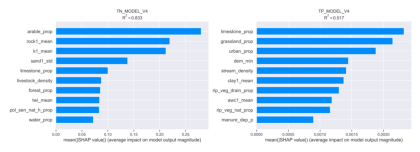

In [85]:
# Plot feature importances based on SHAP values
versions = ['tn_model_v4', 'tp_model_v4']
images = [f'D:/est_water_qual/model/{version}/{version}_shap_imp.png' for version in versions]
fig, axes = plt.subplots(1, 2)
for image, ax in zip(images, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
plt.subplots_adjust(wspace=-1)
plt.tight_layout()
plt.savefig(f'D:/est_water_qual/model/shap_imp.png', dpi=300, bbox_inches='tight')

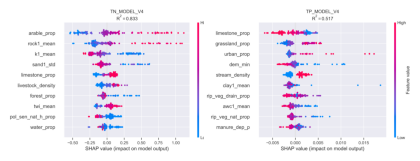

In [86]:
versions = ['tn_model_v4', 'tp_model_v4']
images = [f'D:/est_water_qual/model/{version}/{version}_shap_summary.png' for version in versions]
fig, axes = plt.subplots(1, 2)
for image, ax in zip(images, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
plt.subplots_adjust(wspace=-1)
plt.tight_layout()
plt.savefig(f'D:/est_water_qual/model/shap_summary.png', dpi=300, bbox_inches='tight')

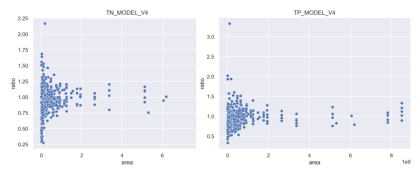

In [88]:
versions = ['tn_model_v4', 'tp_model_v4']
images = [f'D:/est_water_qual/model/{version}/{version}_area_vs_ratio.png' for version in versions]
fig, axes = plt.subplots(1, 2)
for image, ax in zip(images, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
plt.subplots_adjust(wspace=-1)
plt.tight_layout()
plt.savefig(f'D:/est_water_qual/model/area_vs_ratio.png', dpi=300, bbox_inches='tight')

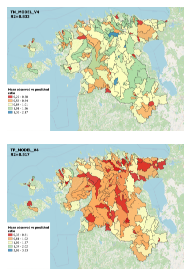

In [9]:
versions = ['tn_model_v4', 'tp_model_v4']
images = [f'D:/est_water_qual/model/{version}_ratio.png' for version in versions]
fig, axes = plt.subplots(2, 1)
for image, ax in zip(images, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.savefig(f'D:/est_water_qual/model/spatial_ratio.png', dpi=300, bbox_inches='tight')